<a href="https://colab.research.google.com/github/tmor8832/JHub-Python/blob/master/Search_Term_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This is a sentiment analysis program, parsing tweets from twitter. Guide was followed from youtube https://www.youtube.com/watch?v=ujId4ipkBio

In [ ]:
#import the relevant libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

Saving login.csv to login (3).csv


{'login.csv': b"key\r\ne1skulGTffD4riROKn5n5RFUk\r\njdeWlPuH49YR1MZLP4mhWDSO29sKbubz3UGKnoDZs0hX6pamU4\r\n1280139097068183552-hIOsTeLEU9iX6iXqI1EWLvrhjCgpIW'\r\n1280139097068183552-hIOsTeLEU9iX6iXqI1EWLvrhjCgpIW\r\nln0YCbQgntyEx41eqfh20v2n5a5KsIu4cFVgeBsgRBQi1"}

In [ ]:
#Extract the data from the CSV file and store as variables
log = pd.read_csv('login.csv')
ConsumerKey = log['key'][0]
ConsumerKeySecret = log['key'][1]
AccessToken = log['key'][3]
AccessTokenSecret = log['key'][4]

In [ ]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(ConsumerKey, ConsumerKeySecret)
authenticate.set_access_token(AccessToken, AccessTokenSecret)
api = tweepy.API(authenticate) #wait_on_rate_limit= True)

In [ ]:
#Gather 2000 tweets on Bitcoin and filter out any retweets
search_term = '#Bitcoin -filter:retweets'
#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang = 'en', since='2021-11-20').items(10) #for 2000 tweets
tweet_loc = tweepy.Cursor(api.search, q=search_term, lang = 'en', since='2021-11-20').items(10)

#store the tweets in a variable
all_tweets = [tweet.text for tweet in tweets]
users_locs = [tweet.user.location for tweet in tweet_loc]

combined_information = {'Tweets': all_tweets, 'Location': users_locs}

df = pd.DataFrame(combined_information)

df.head()

,Tweets,Location
0,"Netflix was the top grossing app in Q2, with m...",
1,@BabyDogeCoin @BabyDogeCoin \n#BabyDogeCoin \...,
2,@MININUKETOKEN Best project ever! I'm so excit...,Global
3,"2/13 \nChivo is Custodial\n\nNot your Node, no...",
4,@MMCrypto @saylor Every time I hear @saylor sp...,Central Europe


In [ ]:
#Clean the tweets to remove unwanted characters and data
def cleanTweet (tweet):
  tweet = re.sub('#bitcoin', 'bitcoin', tweet) #Remove hashtag from bitcoin or Bitcoin
  tweet = re.sub('#Bitcoin', 'Bitcoin', tweet)
  tweet = re.sub('#[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('@[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('$[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('-[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('_[A-Za-z0-9]+', '', tweet) #Remove any strings with a hashtag
  tweet = re.sub('\\n', '', tweet) #removing the '\n' string
  tweet = re.sub('https', '', tweet) #remove any hyperlinks
  tweet = re.sub('http', '', tweet) #remove any hyperlinks
  return tweet

def cleanLoc (user_locs):
  str(user_locs)
  if user_locs != "":
    return user_locs
  else:
    user_locs = 'Unknown'
    return user_locs


In [ ]:
#Call the function and clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTweet)
df.head()
df['Location'] = df['Location'].apply(cleanLoc)
df.head()

,Tweets,Location
0,"Netflix was the top grossing app in Q2, with m...",Unknown
1,Baby Doge It will make you rich soon🚀🚀🚀 ...,Unknown
2,Best project ever! I'm so excited to be part ...,Global
3,"2/13 Chivo is CustodialNot your Node, not your...",Unknown
4,Every time I hear speak I sell more bitcoin...,Central Europe


In [ ]:
# Use of textblob NLTK lib https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
#create a function to get the subjectivity, values between 0 and 1 where 1 is a high degree of personal opinion and not fact
def getSubjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity
#create a function to get the polarity, values bwteen [-1:1] -1 is negative, 1 is a positive sentiment
def getPolarity(tweet):
  return TextBlob(tweet).sentiment.polarity 

In [ ]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df.head(100)

,Tweets,Location,Subjectivity,Polarity,Sentiment
0,"Netflix was the top grossing app in Q2, with m...",Unknown,0.500000,0.500000,Positive
1,Baby Doge It will make you rich soon🚀🚀🚀 ...,Unknown,0.458333,0.270833,Positive
2,Best project ever! I'm so excited to be part ...,Global,0.418750,0.468750,Positive
3,"2/13 Chivo is CustodialNot your Node, not your...",Unknown,0.375000,0.166667,Positive
4,Every time I hear speak I sell more bitcoin...,Central Europe,0.500000,0.500000,Positive
...,...,...,...,...,...
95,bitcoin Enjoy $10 off Orders ...,"Bay Area, CA",0.500000,0.400000,Positive
96,bitcoin on purchases over $25...,"Bay Area, CA",0.000000,0.000000,Neutral
97,bitcoin SAVE BIG ON AIRPORT P...,"Bay Area, CA",0.100000,0.000000,Neutral
98,bitcoin on purchases over $25...,Matter Doesn't Matter,0.000000,0.000000,Neutral


In [ ]:
#create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive' 

In [ ]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#print positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
  if (sortedDF['Sentiment'][i]=='Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1



1)Netflix was the top grossing app in Q2, with mobile revenue up 233% | ://t.co/1RRTMnbokD   bitcoin     ://t.co/n0oUXHT5OX

2)     Baby Doge It will make you rich soon🚀🚀🚀               _classic    Bitcoin  ://t.co/pX3X5JgyDV

3) Best project ever! I'm so excited to be part of this project. I hope this project will gain more popularity in the future.  _x1    Bitcoin      

4)2/13 Chivo is CustodialNot your Node, not your Bitcoin  But at this stage, custodial wallet makes sense for a wider &amp; faster adoptionAnd okay for smaller amounts (what’s $30 anyways?). Let people learn to use basic wallet. They’ll figure out the rest

5)  Every time I hear  speak I sell more bitcoin for $LINK

6)20 hrs to go   Current top bid700,000  Toxic Money - Fiat Scavengerby  accepting bids with The  Collection://t.co/LWyG5MTDnl 🧡😊  bitcoin ://t.co/vD3AQjHfJs

7) The project is great and this projector has a strong team, so hopefully the project will be better in the future.🔥💯    Bitcoin    

8)It’s Satur

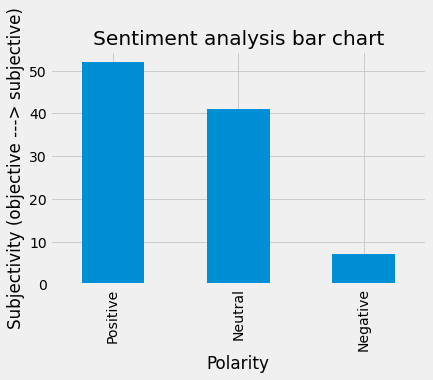

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment analysis bar chart')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective ---> subjective)')
plt.show()


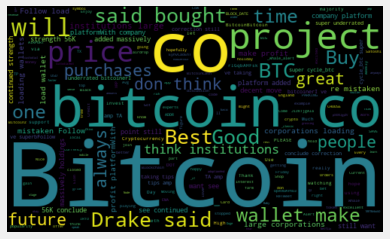

In [ ]:
#Plot a word cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state= 21, max_font_size=119).generate(allWords)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()